In [12]:
from IPython.display import Image

In [1]:
from bs4 import BeautifulSoup

html_text = '"<span class="red">Heavens! what a virulend attck!</span>'
soup = BeautifulSoup(html_text, 'html.parser')

object_tag = soup.find('span')
print('object_tag:', object_tag)
print('attrs:', object_tag.attrs)
print('value:', object_tag.attrs['class'])
print('text:', object_tag.text)

object_tag: <span class="red">Heavens! what a virulend attck!</span>
attrs: {'class': ['red']}
value: ['red']
text: Heavens! what a virulend attck!


### css 속성을 이용한 태그 검색

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/warandpeace.html')
bs = BeautifulSoup(html, "html.parser")

nameList = bs.find_all('span', {'class': 'green'}) # 등장인물의 이름이 모두 녹색인것을 활용 
for name in nameList:
    print(name.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


### 특정 단어 찾기
##### find_all(text='검색어')
###### * 대소문자 구분됨

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/warandpeace.html')
bs = BeautifulSoup(html, 'html.parser')

princeList = bs.find_all(text='the prince') # bs에서 'the prince'를 가진 글자를 찾아 리스트 형태로 반환
print(princeList)
print('the prince count: ', len(princeList))

['the prince', 'the prince', 'the prince', 'the prince', 'the prince', 'the prince', 'the prince']
the prince count:  7


## 트리 이동 : 자식과 자손
#### 출력되는 내용은 같으나 자손의 경우 더 세분화되어 나온다.

##### 자식 : children

In [4]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

table_tag = bs.find('table', {'id' : 'giftList'})
for child in table_tag.children:
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


#### 자손 : descendant

In [5]:
desc = bs.find('table', {'id':'giftList'}).descendants
print('descendatns 개수: ', len(list(desc)))

descendatns 개수:  86


In [6]:
for child in bs.find('table', {'id':'giftList'}).descendants:
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>
<th>
Item Title
</th>

Item Title

<th>
Description
</th>

Description

<th>
Cost
</th>

Cost

<th>
Image
</th>

Image



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>
<td>
Vegetable Basket
</td>

Vegetable Basket

<td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td>

This vegetable basket is the perfect gift for your health conscious (or overweight) friends!

<span class="excitingNote">Now with super-colorful bell peppers!</span>
Now with super-colorful bell peppers!


<td>
$15.00
</td>

$15.00

<td>
<img src="../img/gifts/img1.jpg"

## 트리 이동 : 형제 다루기
#### next_sibling 속성
#### - 임의의 행을 선택하고 next_sibiling을 선택하면 테이블의 다음 행들을 모두 선택

In [7]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('http://www.pythonscraping.com/pages/page3.html')
bs = BeautifulSoup(html, 'html.parser')

for sibling in bs.find('table', {'id' : 'giftList'}).tr.next_siblings: # sibling's'라서 복수의 개수를 모두 찾아줌
    print(sibling)



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

#### previous_siblings 속성
#### 선택된 행 이전의 항목들을 선택

In [8]:
for sibling in bs.find('tr', {'id' : 'gift2'}).previous_siblings: # sibling's'라서 복수의 개수를 모두 찾아줌
    print(sibling)



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>





#### next_sibling, previous_sibling
#### 태그 하나만 반환
#### 문자열 마지막에 공백('\\n' '\\r'등)이 있는 경우 해당 공백을 반환

In [9]:
sibling1 = bs.find('tr', {'id':'gift3'}).next_sibling
print(ord(sibling1)) # ord(문자): 문자의 Unicode 정수를 리턴  
sibling1

10


'\n'

In [10]:
# next_sbling을 두번 붙여써서 다다음껄 출력
sibling2 = bs.find('tr', {'id':'gift3'}).next_sibling.next_sibling
print(sibling2)

<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parrot! <span class="excitingNote">Or maybe he's only resting?</span>
</td><td>
$0.50
</td><td>
<img src="../img/gifts/img4.jpg"/>
</td></tr>


## 트리 이동 : 부모 다루기
#### .parent를 사용하여 해당 태그의 부모로 올라갈 수 있다

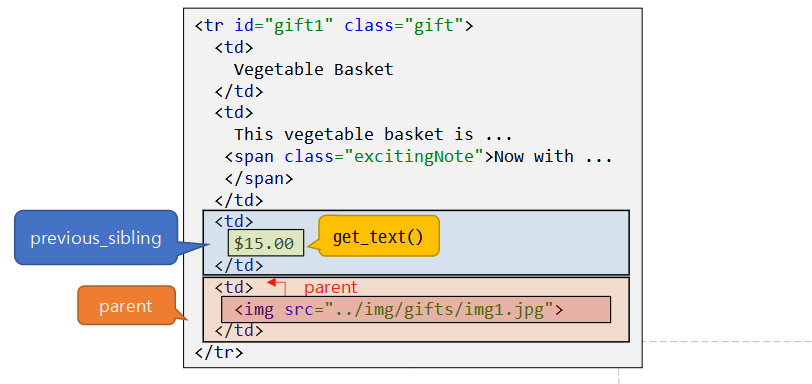

In [13]:
Image('./image/parent.PNG')

In [11]:
img1 = bs.find('img', {'src': '../img/gifts/img1.jpg'})
text = img1.parent.previous_sibling.get_text()
print(text)


$15.00

